<a href="https://colab.research.google.com/github/ciepielajan/SDA_SMOG_Wawelski/blob/main/Jan/SDA_2021_04_11_Projekt_koncowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Załadowanie plików







In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [46]:
!gdown --id "186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4"

Downloading...
From: https://drive.google.com/uc?id=186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4
To: /content/archive.zip
2.39MB [00:00, 74.6MB/s]


In [47]:
!unzip -q "archive.zip" -d data/

replace data/april-2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [48]:
all_file_names = glob.glob("data/*2017.csv")
all_file_names = sorted(all_file_names)
for counter, file in enumerate(all_file_names):
    print(counter, file)

0 data/april-2017.csv
1 data/august-2017.csv
2 data/december-2017.csv
3 data/february-2017.csv
4 data/january-2017.csv
5 data/july-2017.csv
6 data/june-2017.csv
7 data/march-2017.csv
8 data/may-2017.csv
9 data/november-2017.csv
10 data/october-2017.csv
11 data/september-2017.csv


In [49]:
jan = pd.read_csv(all_file_names[4])
feb = pd.read_csv(all_file_names[3])
mar = pd.read_csv(all_file_names[7])
apr = pd.read_csv(all_file_names[0])
may = pd.read_csv(all_file_names[8])
jun = pd.read_csv(all_file_names[6])
jul = pd.read_csv(all_file_names[5])
aug = pd.read_csv(all_file_names[1])
sep = pd.read_csv(all_file_names[11])
octo = pd.read_csv(all_file_names[10])
nov = pd.read_csv(all_file_names[9])
dec = pd.read_csv(all_file_names[2])

In [50]:
dec.head(1)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-12-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0,96,100542,39,38,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.0,70.0,100479.0,25.0,23.0,40.0,0.0,72.0,100527.0,29.0,28.0,48.0,0,96,100531,...,100616.0,27.0,25.0,41.0,0.0,97.0,100602.0,25.0,21.0,35.0,0,97,100810,34,33,62,5.0,97.0,100036.0,12.0,10.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,0,88,100554,32,33,74,0,94,100607,34,36,66


In [51]:
sensors = pd.read_csv("data/sensor_locations.csv")

In [52]:
sensors[:3]

,id,latitude,longitude
0,3,50.057748,19.961375
1,140,50.057747,19.961374
2,142,50.084816,19.878066


2 Połączenie wszystkich df


In [53]:
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])

In [54]:
year.shape

(8593, 337)

In [55]:
year.head(2)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3 Transformacja df







In [56]:
year["UTC time"] = pd.to_datetime(year["UTC time"], format="%Y-%m-%dT%H:%M:%S")
year[:3]

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
year = year.set_index("UTC time")
year[:3]

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,147.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,129.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,134.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
year.index[:3]

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00'],
              dtype='datetime64[ns]', name='UTC time', freq=None)

In [59]:
new_df = pd.DataFrame()

In [60]:
for i in year.groupby(year.columns.str.split('_').str[0], axis=1):
  old = i[1].columns
  new = i[1].columns.str.split("_").str[1]
  zmiana = { k:v  for k,v in zip(old,new)}
  i[1].rename(columns=zmiana,inplace=True)
  i[1]["id"] = i[0]
  new_df = new_df.append(i[1])
  # print(i[1])

In [61]:
new_df[:3]

,temperature,humidity,pressure,pm1,pm25,pm10,id
UTC time,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140


3.2 Połaczenie wartości z konkretnymi lokalizacjami wg ID sensoru

In [62]:
new_df["id"] = new_df["id"].astype(int)
sensors["id"] = sensors["id"].astype(int)

In [63]:
new_df = new_df.reset_index()

In [64]:
geo_df = new_df.merge(sensors, how='left', on='id')
geo_df[:3]

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374


4 EDA

In [65]:
geo_df.shape

(481208, 10)

4.1. Ile jest Nan w danych kolumnach

In [66]:
geo_df.isnull().sum()

UTC time            0
temperature    109558
humidity       109638
pressure       172529
pm1             92854
pm25            92835
pm10            92832
id                  0
latitude            0
longitude           0
dtype: int64

4.2. Czy można znaleźć brakujące dane lub czymś je zastąpić

In [67]:
geo_df = geo_df.dropna()
geo_df.shape

(291754, 10)

4.3. Jakie zastosować normy i ich zakresy dla stężenia pm10 w celu określenia jakości powietrza

In [116]:
geo_df.pm10.describe([0.4,0.75, 0.9, 0.95,0.99])

count    291754.000000
mean         49.589233
std          53.379528
min          -1.000000
40%          26.000000
50%          34.000000
75%          61.000000
90%         102.000000
95%         154.000000
99%         282.000000
max         664.000000
Name: pm10, dtype: float64

Wnioski
> podejrzana wartość to `min = -1`. Poziom stężenia nie może być ujemny. Dane prawdopodobnie wymagają dalszego oczyszczenia. 

> niepokojąca jest też wartość `max=664` . Normy zaczynają sie od 25 a kończna na 150 .  Czy dla wartości powyżej 200 powinniśmy przyjąć własne normy ?

> Istotny jest fakt że 99% danych mieści się w zakresie od 0 do 282.  

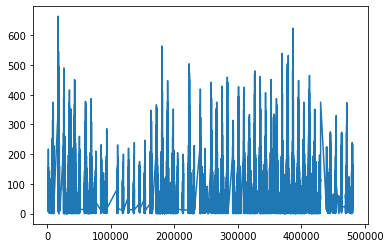

In [69]:
geo_df.pm10.plot()

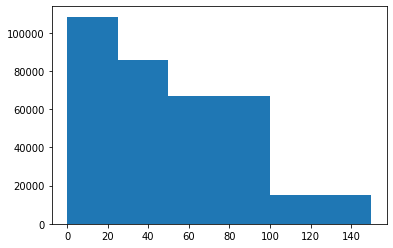

In [70]:
plt.hist(geo_df.pm10, bins=[0,25,50,100,150])
plt.show()

> przyjęte normy i ich zakresy to 50/100/150.   Na powyższym wykresie widać wartości powyżej 200 a nawet 600. Czy są tą błędy pomiarowe czy i dla nich zrobić klasyfikację. Poniżej sprawdzę zakresy dla konkretnej stacji. 

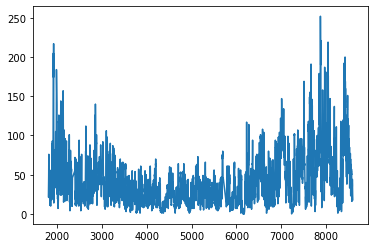

In [71]:
geo_df[geo_df["id"]==140].pm10.plot()

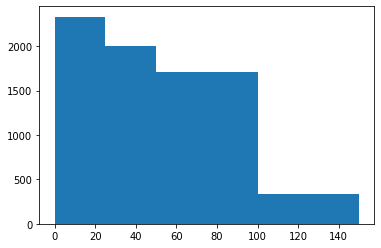

In [72]:
plt.hist(geo_df[geo_df["id"]==140].pm10, bins=[0,25,50,100,150])
plt.show()

Wnioski:
> Źródła zgodnie podają że stan powyżej 100 dla pm10 jest "alarmujący". Z uwagi że podaczas wysiku fizycznego na świerzym powietrzu pobiera się wiecej powietrza niż przy zwykłej aktywnośći uznaję że wszytkie pomiary powyżej 100 będą uznawane za szkodliwe dla zdrowia. 

> Zakresy dla PM10 które będę w dalszych krokach prowadziło to 0,25,50,100,150

5 Zmiana danych na kategoryczne - Rozbicie TimeSeries na dzień, miesiąc etc


In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
geo_df["M"] = geo_df["UTC time"].dt.month
geo_df["D"] = geo_df["UTC time"].dt.day
geo_df["H"] = geo_df["UTC time"].dt.hour
# geo_df["Week"] = geo_df["UTC time"].dt.week
# geo_df["day of  Week"] = geo_df["UTC time"].dt.dayofweek
# geo_df["Weekend"] = geo_df["UTC time"].dt.dayofweek.apply(lambda x: "1" if x in [5,6] else "0"   )
# geo_df["day of  Year"] = geo_df["UTC time"].dt.dayofyear
# geo_df["Quorter"] = geo_df["UTC time"].dt.quarter
geo_df

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude,M,D,H
1811,2017-03-17 11:00:00,12.0,44.0,101244.0,16.0,10.0,22.0,140,50.057747,19.961374,3,17,11
1812,2017-03-17 12:00:00,12.0,45.0,101147.0,18.0,12.0,26.0,140,50.057747,19.961374,3,17,12
1813,2017-03-17 13:00:00,12.0,43.0,101049.0,18.0,12.0,26.0,140,50.057747,19.961374,3,17,13
1814,2017-03-17 14:00:00,12.0,45.0,100930.0,23.0,17.0,32.0,140,50.057747,19.961374,3,17,14
1815,2017-03-17 15:00:00,12.0,50.0,100873.0,29.0,24.0,45.0,140,50.057747,19.961374,3,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481203,2017-12-24 20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895,50.084966,19.877998,12,24,20
481204,2017-12-24 21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895,50.084966,19.877998,12,24,21
481205,2017-12-24 22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895,50.084966,19.877998,12,24,22
481206,2017-12-24 23:00:00,5.0,85.0,101837.0,10.0,12.0,21.0,895,50.084966,19.877998,12,24,23


6 Normalizacja współrzędnych - Standard scaller lub wzór (-50x1000)

7 Predykcja - szukanie najlepszego modelu

7.1 Regression

In [75]:
X = geo_df[["temperature",	"humidity","pressure","latitude","longitude","M","D",	"H"]]
X[:3]

,temperature,humidity,pressure,latitude,longitude,M,D,H
1811,12.0,44.0,101244.0,50.057747,19.961374,3,17,11
1812,12.0,45.0,101147.0,50.057747,19.961374,3,17,12
1813,12.0,43.0,101049.0,50.057747,19.961374,3,17,13


In [76]:
y = geo_df["pm10"]
y[:3]

1811    22.0
1812    26.0
1813    26.0
Name: pm10, dtype: float64

7.1.1 Regresja liniowa

In [77]:
from sklearn.linear_model import LinearRegression

7.1.1.2 Regresja liniowa Podstawowy model

In [78]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#wygenerowanie danych do testowej predykcji
val_1812 = geo_df[["temperature",	"humidity","pressure","latitude","longitude","M","D",	"H"]].iloc[1812].values
df_predict = pd.DataFrame([val_1812], columns=["temperature",	"humidity","pressure","latitude","longitude","M","D",	"H"])
df_predict

,temperature,humidity,pressure,latitude,longitude,M,D,H
0,24.0,37.0,101792.0,50.057747,19.961374,6.0,3.0,11.0


In [80]:
#przewidziało
prediction = model.predict(df_predict)
prediction

array([1.6007795])

In [81]:
#powinno być
geo_df["pm10"].iloc[1812]

6.0

7.1.1.3 Regresja liniowa - Dostrajanie modelu np grid search

7.1.2.1 RandomForestRegressor()

In [82]:
from sklearn.ensemble import RandomForestRegressor

7.1.2.2 RandomForestRegressor() - Podstawowy model

In [83]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [84]:
#wygenerowanie danych do testowej predykcji
val_1812 = geo_df[["temperature",	"humidity","pressure","latitude","longitude","M","D",	"H"]].iloc[1812].values
df_predict = pd.DataFrame([val_1812], columns=["temperature",	"humidity","pressure","latitude","longitude","M","D",	"H"])
df_predict

,temperature,humidity,pressure,latitude,longitude,M,D,H
0,24.0,37.0,101792.0,50.057747,19.961374,6.0,3.0,11.0


In [85]:
#przewidziało
prediction = model.predict(df_predict)
prediction

array([6.21])

In [86]:
#powinno być
geo_df["pm10"].iloc[1812]

6.0

7.1.2.3 RandomForestRegressor() - Dostrajanie modelu np grid search

7.2 Predykcja TimeSeries

7.2.1 arima (pmd arima auto-arima)

7.2.2 Profet

7.3 RNN

7.3.1 LSTM

7.3.1.1 LSTM - Podstawowy

7.3.1.2 LSTM - Dwukierunkowy

7.3.2 GRU

7.3.2.1 GRU - Podstawowy

7.3.2.2 GRU - Dwukierunkowy

8 Zestawienie wyników predykcji - wybranie najlepszego modelu do predykcji 

9 Obliczenie predykcji dla nowej daty dla wszystkich punktów pomiarowych 

10 Prototyp

10.1 Utworzenie siatki punktów w na terenie całego krakowa zlokalizowanych co 500m

In [87]:
left_top_corner =  [50.107 ,19.82]

points = pd.DataFrame()

for i in range(45):
  id_i = str(i+1) 
  i = i * 0.00463  # im mniejsza wartość tym bliższe odległości od kolejnego punktu
  for x in range(35):
    id = id_i + "-" + str(x+1)
    x = x * 0.00297      # im mniejsza wartość tym bliższe odległości od kolejnego punktu
    lat = left_top_corner[0] - x
    lon = left_top_corner[1] + i
    pm10= 0
    points = points.append({"id":id,"Latitude":lat,"Longitude":lon,"PM10":pm10},ignore_index=True)

points

,Latitude,Longitude,PM10,id
0,50.10700,19.82000,0.0,1-1
1,50.10403,19.82000,0.0,1-2
2,50.10106,19.82000,0.0,1-3
3,50.09809,19.82000,0.0,1-4
4,50.09512,19.82000,0.0,1-5
...,...,...,...,...
1570,50.01790,20.02372,0.0,45-31
1571,50.01493,20.02372,0.0,45-32
1572,50.01196,20.02372,0.0,45-33
1573,50.00899,20.02372,0.0,45-34


10.2 Obliczenie predykcji dla wszystkich stacji pomiarowych dla konkretnej daty

In [88]:
#wygenerowanie danych do testowej predykcji
val_1812 = geo_df[["temperature",	"humidity","pressure","M","D",	"H"]].iloc[1812].values
df_predict = pd.DataFrame([val_1812], columns=["temperature",	"humidity","pressure","M","D",	"H"])
df_predict

,temperature,humidity,pressure,M,D,H
0,24.0,37.0,101792.0,6.0,3.0,11.0


In [89]:
points["temperature"] = df_predict["temperature"].iloc[0]
points["humidity"] = df_predict["humidity"].iloc[0]
points["pressure"] = df_predict["pressure"].iloc[0]
points["M"] = df_predict["M"].iloc[0]
points["D"] = df_predict["D"].iloc[0]
points["H"] = df_predict["H"].iloc[0]
points[:3]

,Latitude,Longitude,PM10,id,temperature,humidity,pressure,M,D,H
0,50.10700,19.82,0.0,1-1,24.0,37.0,101792.0,6.0,3.0,11.0
1,50.10403,19.82,0.0,1-2,24.0,37.0,101792.0,6.0,3.0,11.0
2,50.10106,19.82,0.0,1-3,24.0,37.0,101792.0,6.0,3.0,11.0


In [90]:
points = points[["temperature",	"humidity","pressure","Latitude","Longitude","M","D",	"H"]]
points[:3]

,temperature,humidity,pressure,Latitude,Longitude,M,D,H
0,24.0,37.0,101792.0,50.10700,19.82,6.0,3.0,11.0
1,24.0,37.0,101792.0,50.10403,19.82,6.0,3.0,11.0
2,24.0,37.0,101792.0,50.10106,19.82,6.0,3.0,11.0


In [91]:
#przewidziało
prediction = model.predict(points)
prediction

array([8.47, 8.47, 8.47, ..., 8.67, 8.38, 8.38])

In [92]:
points["prediction_pm10"] = prediction
points[:3]

,temperature,humidity,pressure,Latitude,Longitude,M,D,H,prediction_pm10
0,24.0,37.0,101792.0,50.10700,19.82,6.0,3.0,11.0,8.47
1,24.0,37.0,101792.0,50.10403,19.82,6.0,3.0,11.0,8.47
2,24.0,37.0,101792.0,50.10106,19.82,6.0,3.0,11.0,8.47


In [93]:
points.describe()

,temperature,humidity,pressure,Latitude,Longitude,M,D,H,prediction_pm10
count,1575.0,1575.0,1575.0,1575.000000,1575.00000,1575.0,1575.0,1575.0,1575.000000
mean,24.0,37.0,101792.0,50.056510,19.92186,6.0,3.0,11.0,7.846152
std,0.0,0.0,0.0,0.030005,0.06015,0.0,0.0,0.0,0.735933
min,24.0,37.0,101792.0,50.006020,19.82000,6.0,3.0,11.0,6.200000
25%,24.0,37.0,101792.0,50.029780,19.87093,6.0,3.0,11.0,7.260000
50%,24.0,37.0,101792.0,50.056510,19.92186,6.0,3.0,11.0,7.810000
75%,24.0,37.0,101792.0,50.083240,19.97279,6.0,3.0,11.0,8.330000
max,24.0,37.0,101792.0,50.107000,20.02372,6.0,3.0,11.0,11.330000


In [94]:
!pip -q install folium
import folium

In [111]:
location = [50.0614 ,19.9366]

m = folium.Map(location=location, zoom_start=17)


for ind in points.index: 
    tooltip_txt = 'PM10:' + str(points['prediction_pm10'][ind])
    
    if points['prediction_pm10'][ind] <= 25:
      color="green",
    elif (points['prediction_pm10'][ind] >= 50) & (points['prediction_pm10'][ind] < 100):
      color="orange",
    elif (points['prediction_pm10'][ind] >= 100) & (points['prediction_pm10'][ind] < 150):
      color="red",
    elif (points['prediction_pm10'][ind] >= 150):
      color="black",
    else:
      color="white"

    folium.Circle(
          location=[float(points['Latitude'][ind]), float(points['Longitude'][ind])], 
          radius=165,
          # popup="Laurelhurst Park",
          # fill=True,
          # fill_color="#3186cc",
          fill_color=color,
          color=color,
          tooltip= tooltip_txt
      ).add_to(m)
m

> zastanawiam się czy model nie został przeuczony dla  wartości z małym stężeniem. Sprawdziłem proporacje w zbiorze i 40% wartości dla pm10 sa z zakresu 0-26.   Może trzeba pomyśleć o upsample/downsample . Nie pamiętam czy przy predykcji można ją stosować.    Co myślicie ?  Skoro ustalimy wcześniej zakrsy to może przerzucić się na klasyfikacje a nie regresję ?

> aby upewnić się trzeba zastosować predykcję dla dnia w którym na pewno było wysokie stęrzenie pm10

In [117]:
name_file = "index.html"

m.save(name_file)
from google.colab import files
files.download(name_file) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10.3 Utworzenie modelu K-najbliższych sąsiadów -regression (odległość, haversine distance- odległość km )